# 1. Understanding the Dataset

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Housing.csv')

# Display the first few rows of the dataset
print(data.head())

# Display the summary statistics of the dataset
print(data.describe(include='all'))


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521  20141013T000000  231300.0         2       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

# 2. Data Cleaning

## Identifying Missing Values

In [3]:
# Check for any missing values in the dataset
missing_values = data.isnull().sum()

# Print the number of missing values for each column
print(missing_values)


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Identifying Outliers

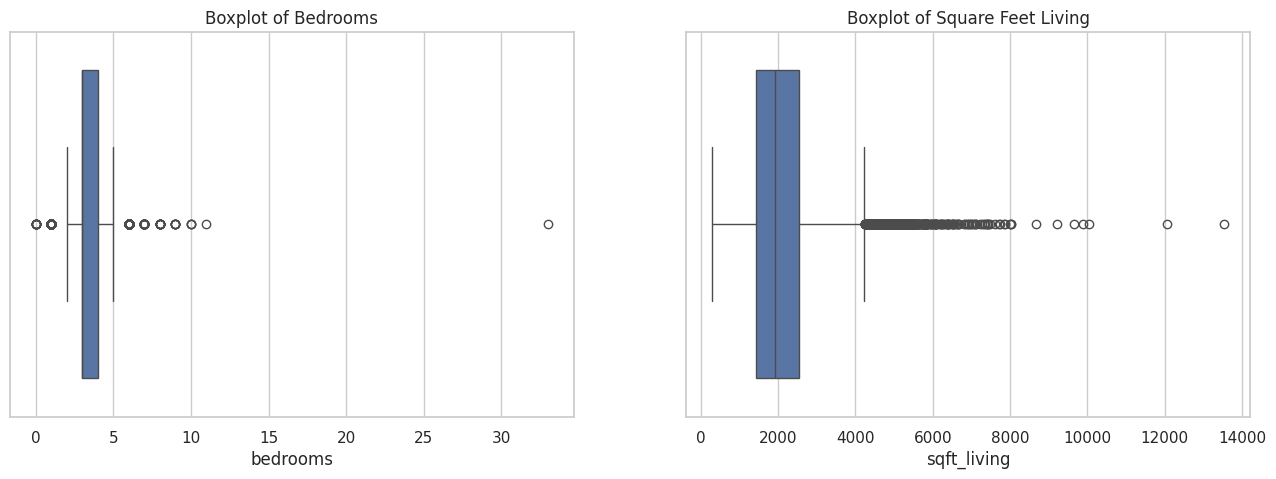

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure to hold the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plotting boxplots
sns.boxplot(data=data, x='bedrooms', ax=axes[0]).set_title('Boxplot of Bedrooms')
sns.boxplot(data=data, x='sqft_living', ax=axes[1]).set_title('Boxplot of Square Feet Living')

# Displaying the plot
plt.show()


### Handling Outliers in Bedrooms:

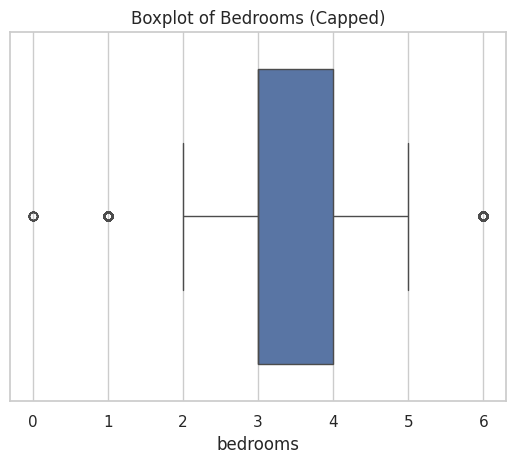

In [5]:
# Capping the 'bedrooms' at the 99th percentile
cap_threshold = data['bedrooms'].quantile(0.99)
data['bedrooms'] = data['bedrooms'].clip(upper=cap_threshold)

# Re-plotting the boxplot for bedrooms
sns.boxplot(data=data, x='bedrooms').set_title('Boxplot of Bedrooms (Capped)')
plt.show()


### Handling Outliers in sqft_living:

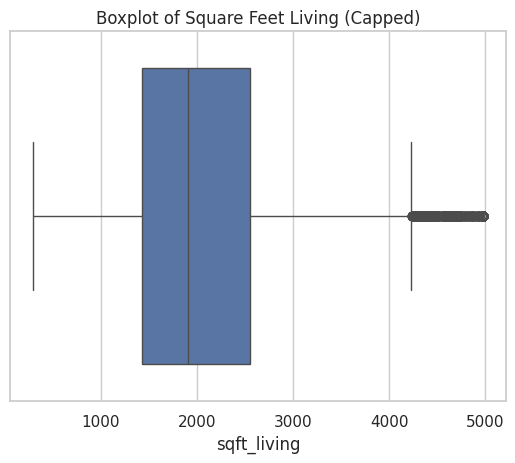

In [6]:
# Capping the 'sqft_living' at the 99th percentile
cap_sqft_living_threshold = data['sqft_living'].quantile(0.99)
data['sqft_living'] = data['sqft_living'].clip(upper=cap_sqft_living_threshold)

# Re-plotting the boxplot for sqft_living
sns.boxplot(data=data, x='sqft_living').set_title('Boxplot of Square Feet Living (Capped)')
plt.show()


## Zero Values Investigation:

In [7]:
# Count the number of zeros in 'yr_renovated'
zero_renovated_count = (data['yr_renovated'] == 0).sum()

# Calculate the percentage of zeros
total_entries = data.shape[0]
zero_renovated_percentage = (zero_renovated_count / total_entries) * 100

# Display the count and percentage of zeros
print(f"Count of zero values in 'yr_renovated': {zero_renovated_count}")
print(f"Percentage of zero values: {zero_renovated_percentage:.2f}%")

# Descriptive statistics for properties with and without renovation
print("Properties that have not been renovated:")
print(data[data['yr_renovated'] == 0].describe())

print("Properties that have been renovated:")
print(data[data['yr_renovated'] != 0].describe())


Count of zero values in 'yr_renovated': 20699
Percentage of zero values: 95.77%
Properties that have not been renovated:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.069900e+04  2.069900e+04  20699.000000  20699.000000  20699.000000   
mean   4.590548e+09  5.303613e+05      3.361660      2.106624   2060.283685   
std    2.875472e+09  3.495776e+05      0.884493      0.763414    869.599636   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.126049e+09  3.200000e+05      3.000000      1.500000   1420.000000   
50%    3.904990e+09  4.480000e+05      3.000000      2.250000   1900.000000   
75%    7.334401e+09  6.344000e+05      4.000000      2.500000   2530.000000   
max    9.900000e+09  6.885000e+06      6.000000      8.000000   4978.800000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.069900e+04  20699.000000  20699.000000  20699.000000  20699.000000   
mean   1.

### Creating a Binary Renovation Indicator:

In [8]:
# Create a new column 'renovated' where 0 indicates not renovated and 1 indicates renovated
data['renovated'] = (data['yr_renovated'] > 0).astype(int)

# Display the distribution of the new binary 'renovated' column
print(data['renovated'].value_counts())


renovated
0    20699
1      914
Name: count, dtype: int64


## Converting Date Field:

In [9]:
# Convert 'date' column from string to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')

# Display the first few rows to confirm the conversion
print(data[['date']].head())


        date
0 2014-10-13
1 2014-12-09
2 2015-02-25
3 2014-12-09
4 2015-02-18


### Check Data Types:

In [10]:
# Display data types of each column
print(data.dtypes)


id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living             float64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
renovated                 int64
dtype: object


### Convert 'zipcode' to a categorical type

In [11]:
# Convert 'zipcode' to a categorical type
data['zipcode'] = data['zipcode'].astype('category')

# Display the updated data type for 'zipcode'
print(data['zipcode'].dtype)


category


In [12]:
# One-hot encode 'condition' using pandas get_dummies
condition_encoded = pd.get_dummies(data['condition'], prefix='cond')

# Concatenate the new one-hot encoded columns to the original DataFrame
data = pd.concat([data, condition_encoded], axis=1)

# Display the first few rows to confirm the new columns
print(data.head())


           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521 2014-10-13  231300.0         2       1.00       1180.0   
1  6414100192 2014-12-09  538000.0         3       2.25       2570.0   
2  5631500400 2015-02-25  180000.0         2       1.00        770.0   
3  2487200875 2014-12-09  604000.0         4       3.00       1960.0   
4  1954400510 2015-02-18  510000.0         3       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...      lat     long  sqft_living15  \
0      5650     1.0           0     0  ...  47.5112 -122.257           1340   
1      7242     2.0           0     0  ...  47.7210 -122.319           1690   
2     10000     1.0           0     0  ...  47.7379 -122.233           2720   
3      5000     1.0           0     0  ...  47.5208 -122.393           1360   
4      8080     1.0           0     0  ...  47.6168 -122.045           1800   

   sqft_lot15  renovated  cond_1 cond_2  cond_3  cond_4  cond_5  
0        5650          0  

### Reviewing Existing Features

In [13]:
# Display the data types of each column and the first few rows to understand their format and current values
print(data.dtypes)
print(data.head())


id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living             float64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                category
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
renovated                 int64
cond_1                     bool
cond_2                     bool
cond_3                     bool
cond_4                     bool
cond_5                     bool
dtype: object
           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521 2014-10-13  231300.0         2      

### Interaction Terms

In [14]:
# Create a new feature 'sqft_living_per_floor'
data['sqft_living_per_floor'] = data['sqft_living'] / data['floors']

# Display the first few rows to see the new feature
print(data[['sqft_living', 'floors', 'sqft_living_per_floor']].head())


   sqft_living  floors  sqft_living_per_floor
0       1180.0     1.0                 1180.0
1       2570.0     2.0                 1285.0
2        770.0     1.0                  770.0
3       1960.0     1.0                 1960.0
4       1680.0     1.0                 1680.0


### Polynomial Features

In [15]:
# Create polynomial features for 'sqft_living'
data['sqft_living_squared'] = data['sqft_living'] ** 2
data['sqft_living_cubed'] = data['sqft_living'] ** 3

# Display the first few rows to see the new features
print(data[['sqft_living', 'sqft_living_squared', 'sqft_living_cubed']].head())


   sqft_living  sqft_living_squared  sqft_living_cubed
0       1180.0            1392400.0       1.643032e+09
1       2570.0            6604900.0       1.697459e+10
2        770.0             592900.0       4.565330e+08
3       1960.0            3841600.0       7.529536e+09
4       1680.0            2822400.0       4.741632e+09


### Aggregate Features

In [16]:
# Create an aggregate feature 'total_sqft'
data['total_sqft'] = data['sqft_living'] + data['sqft_lot'] + data['sqft_above'] + data['sqft_basement']

# Display the first few rows to see the new feature
print(data[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'total_sqft']].head())


   sqft_living  sqft_lot  sqft_above  sqft_basement  total_sqft
0       1180.0      5650        1180              0      8010.0
1       2570.0      7242        2170            400     12382.0
2        770.0     10000         770              0     11540.0
3       1960.0      5000        1050            910      8920.0
4       1680.0      8080        1680              0     11440.0


# Exploratory Data Analysis 

## Univariate Analysis

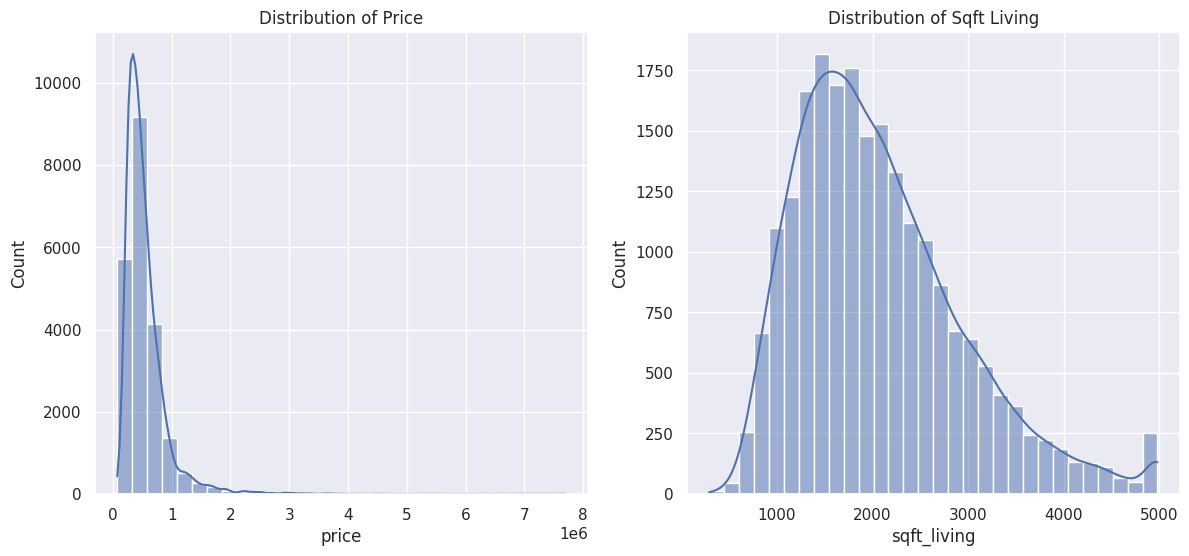

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="darkgrid")

# Creating histograms for continuous variables
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Price')

plt.subplot(1, 2, 2)
sns.histplot(data['sqft_living'], bins=30, kde=True)
plt.title('Distribution of Sqft Living')

plt.show()


## Bivariate Analysis

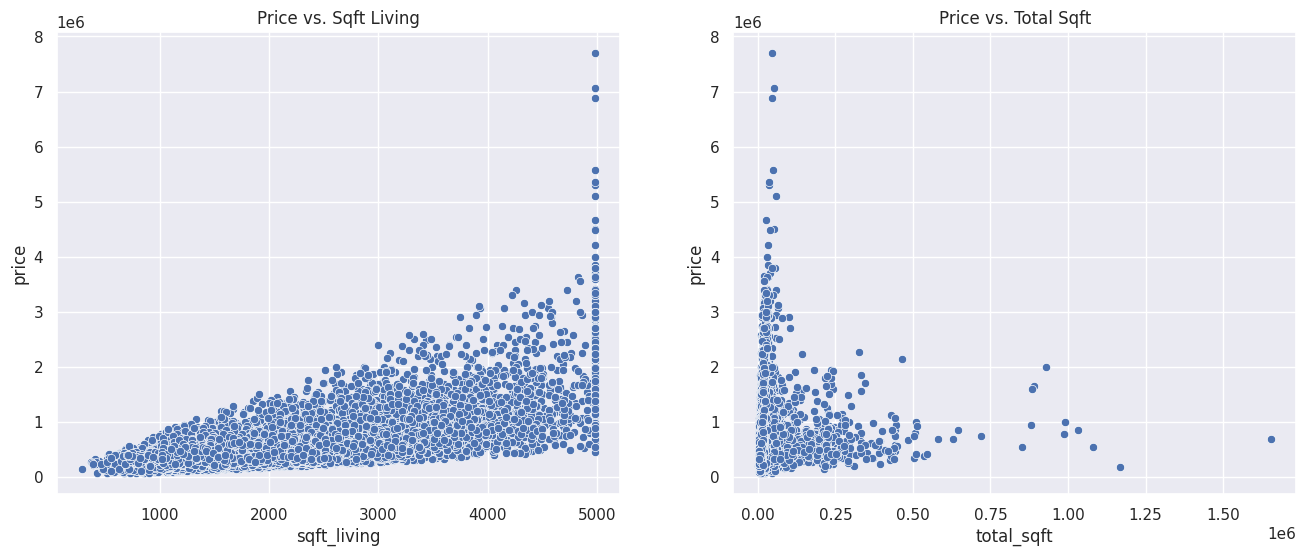

In [18]:
plt.figure(figsize=(16, 6))

# Scatter plot for price vs. sqft_living
plt.subplot(1, 2, 1)
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title('Price vs. Sqft Living')

# Scatter plot for price vs. total_sqft
plt.subplot(1, 2, 2)
sns.scatterplot(x='total_sqft', y='price', data=data)
plt.title('Price vs. Total Sqft')

plt.show()


## Bivariate Analysis with Categorical Variables

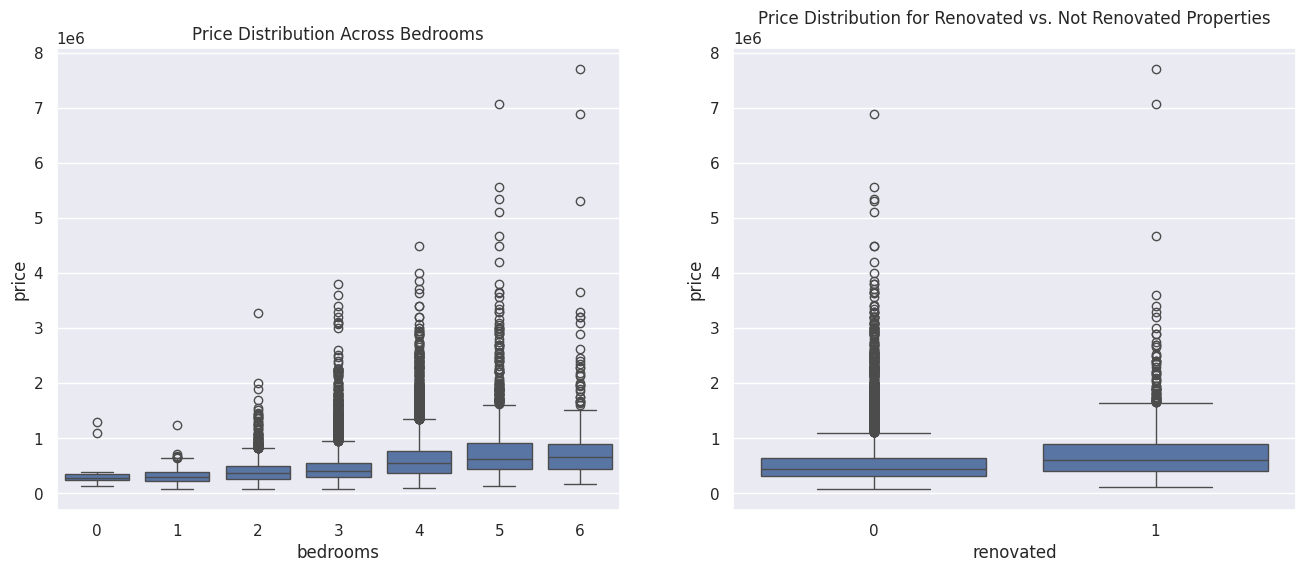

In [19]:
plt.figure(figsize=(16, 6))

# Box plot for price vs. bedrooms
plt.subplot(1, 2, 1)
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Price Distribution Across Bedrooms')

# Box plot for price vs. renovated
plt.subplot(1, 2, 2)
sns.boxplot(x='renovated', y='price', data=data)
plt.title('Price Distribution for Renovated vs. Not Renovated Properties')

plt.show()


## Multivariate Analysis

### Pair Plot

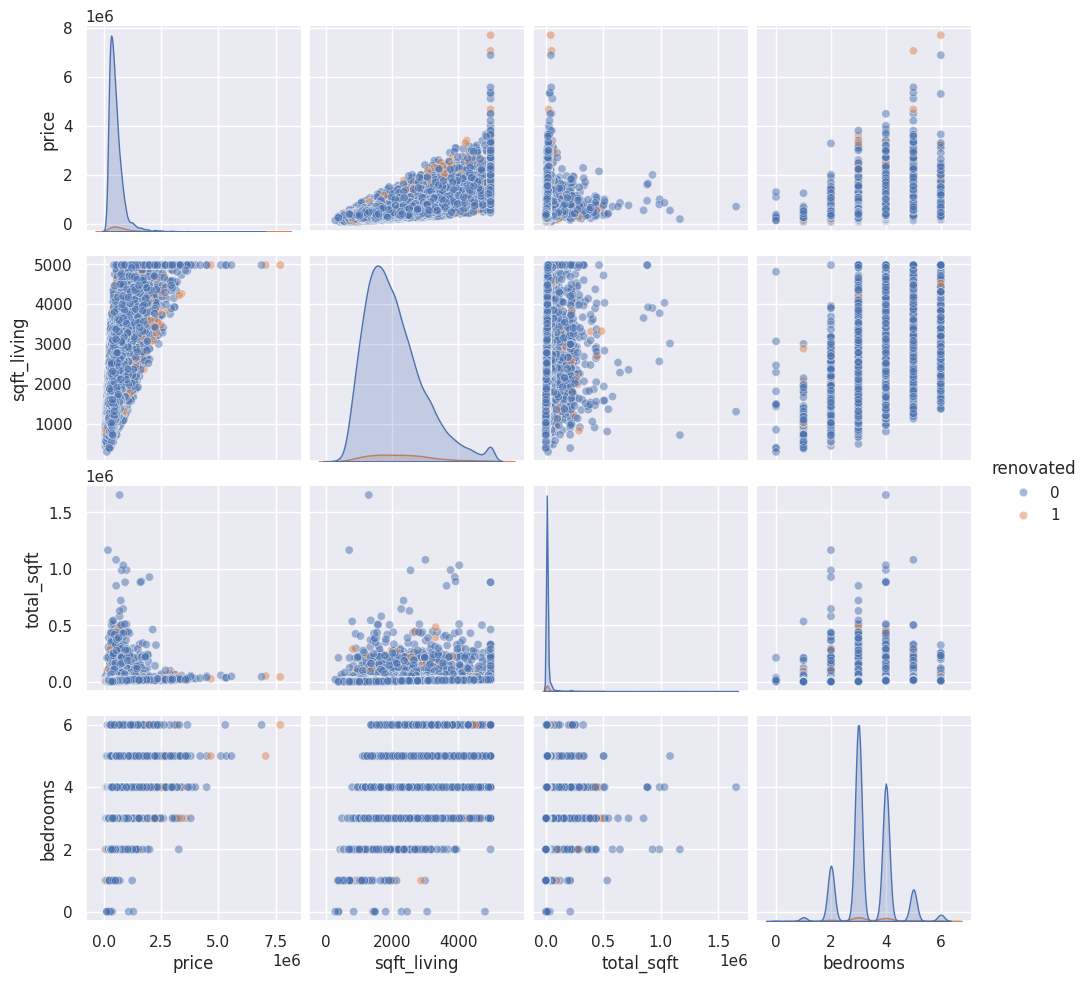

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a subset of the data for the pair plot to make it more manageable
subset_data = data[['price', 'sqft_living', 'total_sqft', 'bedrooms', 'renovated']]

# Creating the pair plot
sns.pairplot(subset_data, hue='renovated', plot_kws={'alpha':0.5})
plt.show()


### Heatmap of Correlation Matrix

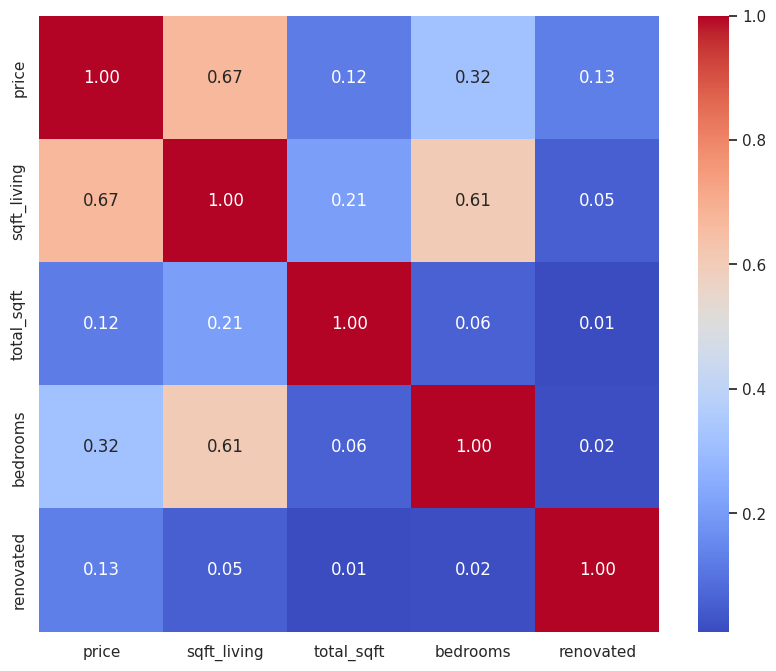

In [21]:
# Calculate the correlation matrix
corr_matrix = subset_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


### Interactive 3D Scatter Plot

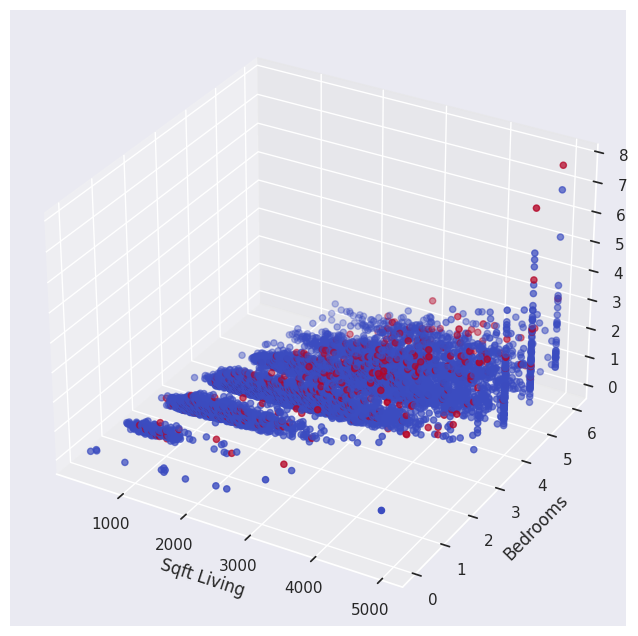

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Example variables: price, sqft_living, and bedrooms
ax.scatter(data['sqft_living'], data['bedrooms'], data['price'], c=data['renovated'], cmap='coolwarm')
ax.set_xlabel('Sqft Living')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

plt.show()
